In [1]:
import pandas as pd

# File paths for the datasets
file_path = r'D:\Research\Python\Data\WIP\TF-IDF Search terms\Terms.csv'

# Load the datasets into dataframes and name them accordingly
df = pd.read_csv(file_path)


In [2]:
# Group the data by 'Dataset' and join the 'terms' within each group
df_grouped = df.groupby('Dataset')['terms'].apply(' '.join).reset_index()

# Split the space-separated words in 'terms' and convert them into a list
df_grouped['terms'] = df_grouped['terms'].str.split()

# Remove duplicate terms in each row
df_grouped['terms'] = df_grouped['terms'].apply(lambda x: list(set(x)))

# Save the results to a new CSV file
output_file_path = 'D:/Research/Python/Data/WIP/TF-IDF Search terms/unique_terms.csv'
df_grouped.to_csv(output_file_path, index=False)

In [3]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df_grouped is already created from the previous code

# Get a list of all files in the 'D:/Research/Python/Data/WIP/Spike Data' directory
spike_data_folder_path = 'D:/Research/Python/Data/WIP/Spike Data'
file_names = os.listdir(spike_data_folder_path)

# Remove the '.csv' extension from file names
file_names_without_extension = [file_name[:-4] for file_name in file_names if file_name.endswith('.csv')]

# Filter the dataset names that exist in both df_grouped and in the Spike Data folder
common_dataset_names = list(set(file_names_without_extension).intersection(set(df_grouped['Dataset'])))

# Load the stopwords from the CSV file
stopwords_file_path = 'D:/Research/Python/Data/WIP/TF-IDF Search terms/Stopwords.csv'
with open(stopwords_file_path, 'r') as f:
    stopwords = f.read().splitlines()

# Create a list to store the dataset names and their top 20 terms with scores
dataset_top_20_terms_list = []

# Perform TF-IDF for each dataset in df_grouped
for index, row in df_grouped.iterrows():
    dataset_name = row['Dataset']
    terms_list = row['terms']
    terms = ' '.join(terms_list)

    print(f"Processing dataset: {dataset_name}")
    print(f"Number of terms in the dataset: {len(terms_list)}")

    # Initialize the TF-IDF vectorizer with the terms and stopwords
    vectorizer = TfidfVectorizer(stop_words=stopwords)

    # Calculate TF-IDF scores for each term in the dataset (returns a sparse matrix)
    tfidf_scores = vectorizer.fit_transform([terms])

    # Get the feature names (terms) from the vectorizer
    feature_names = vectorizer.get_feature_names_out()
    print(f"Number of features (terms) in the dataset: {len(feature_names)}")

    # Convert TF-IDF scores to a dense array
    tfidf_scores_dense = tfidf_scores.toarray()

    # Get the indices to sort the terms in descending order of their TF-IDF scores
    sorted_indices = tfidf_scores_dense.argsort(axis=1)[:, ::-1]

    # Get the top 20 terms and their scores for the dataset
    top_20_indices = sorted_indices[:, :20]
    top_20_scores = [tfidf_scores_dense[i, top_20_indices[i]].tolist() for i in range(tfidf_scores_dense.shape[0])]
    top_20_terms = [feature_names[j] for j in top_20_indices.flat]

    # Append the dataset name and the top 20 term-score pairs to the list
    dataset_top_20_terms_list.append({'Dataset': dataset_name, **dict(zip(top_20_terms, top_20_scores[0]))})

# Create a DataFrame from the list of dataset name and top 20 term-score pairs
df_top_20_terms_all = pd.DataFrame(dataset_top_20_terms_list)

# Save the top 20 terms and their scores to a CSV file
output_top_20_terms_file_path = 'D:/Research/Python/Data/WIP/TF-IDF Search terms/top_20_terms_results.csv'
df_top_20_terms_all.to_csv(output_top_20_terms_file_path, index=False)
print(f"Top 20 terms and their scores saved to: {output_top_20_terms_file_path}")

Processing dataset: 2021-01-07_spike_data
Number of terms in the dataset: 28
Number of features (terms) in the dataset: 7
Processing dataset: 2021-04-07_spike_data
Number of terms in the dataset: 38
Number of features (terms) in the dataset: 14
Processing dataset: 2021-05-06_spike_data
Number of terms in the dataset: 107
Number of features (terms) in the dataset: 45
Processing dataset: 2021-06-06_spike_data
Number of terms in the dataset: 39
Number of features (terms) in the dataset: 13
Processing dataset: 2021-06-07_spike_data
Number of terms in the dataset: 28
Number of features (terms) in the dataset: 5
Processing dataset: 2021-10-31_spike_data
Number of terms in the dataset: 95
Number of features (terms) in the dataset: 40
Processing dataset: 2021-11-11_spike_data
Number of terms in the dataset: 19
Number of features (terms) in the dataset: 4
Processing dataset: 2022-02-09_spike_data
Number of terms in the dataset: 19
Number of features (terms) in the dataset: 4
Processing dataset:

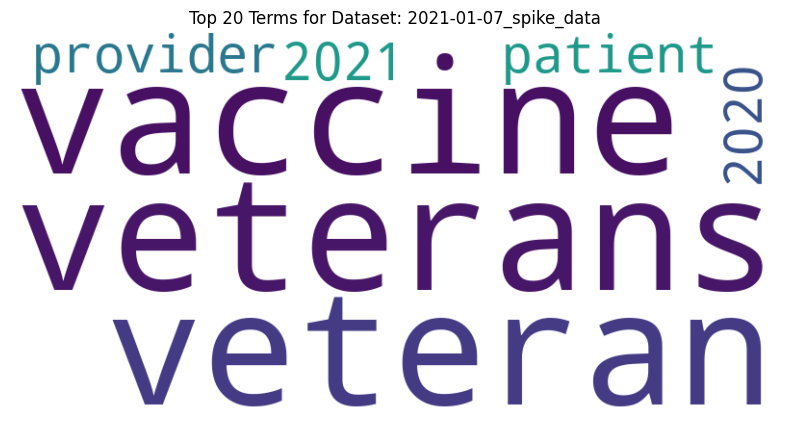

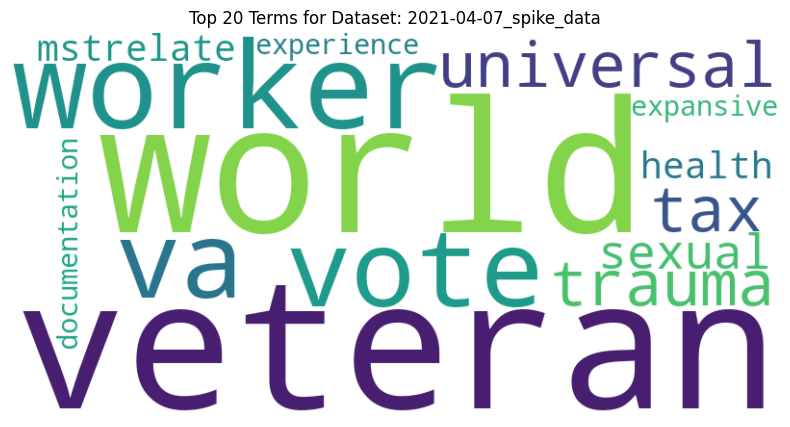

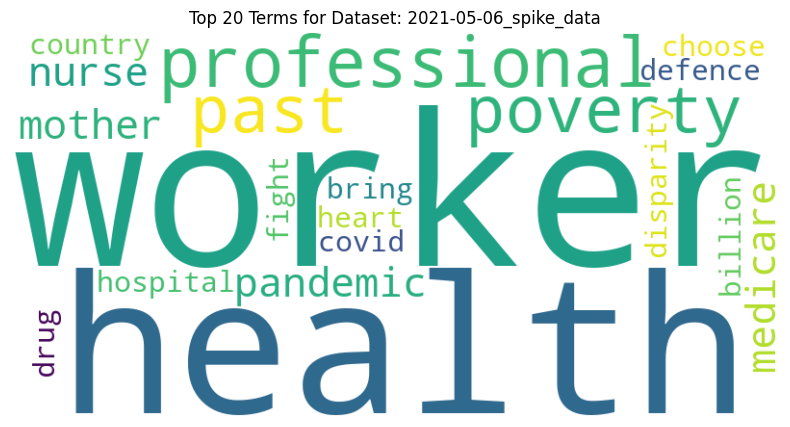

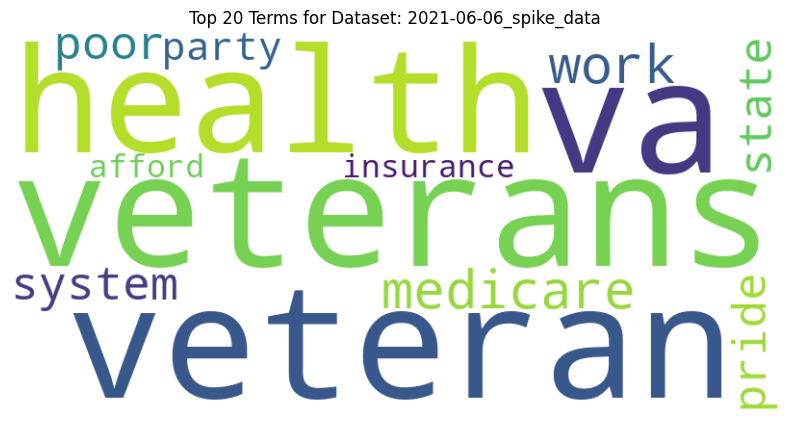

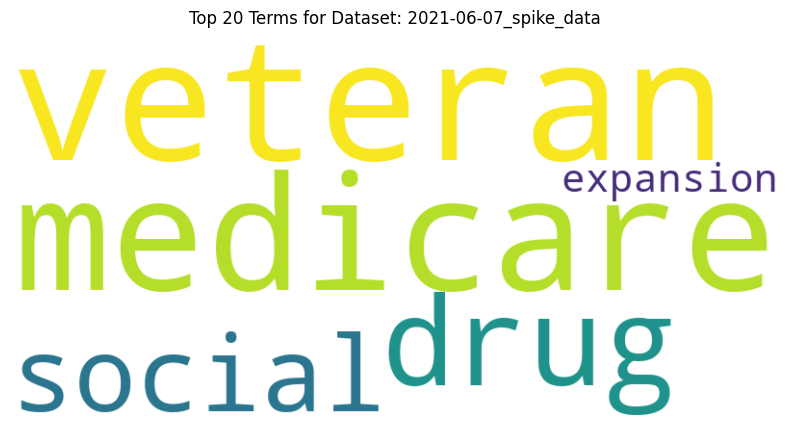

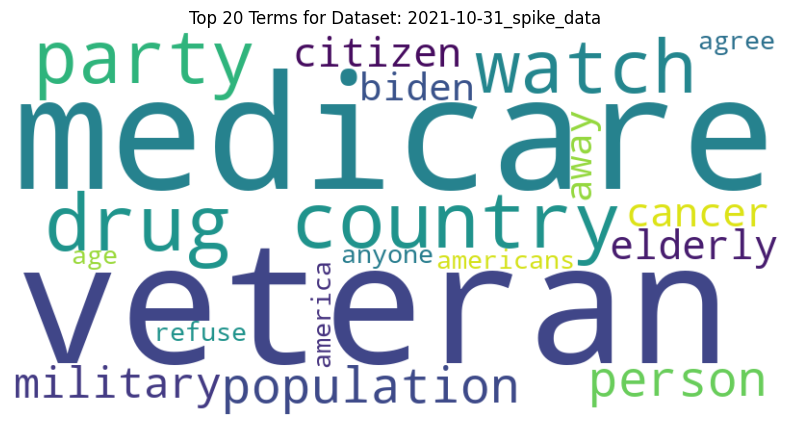

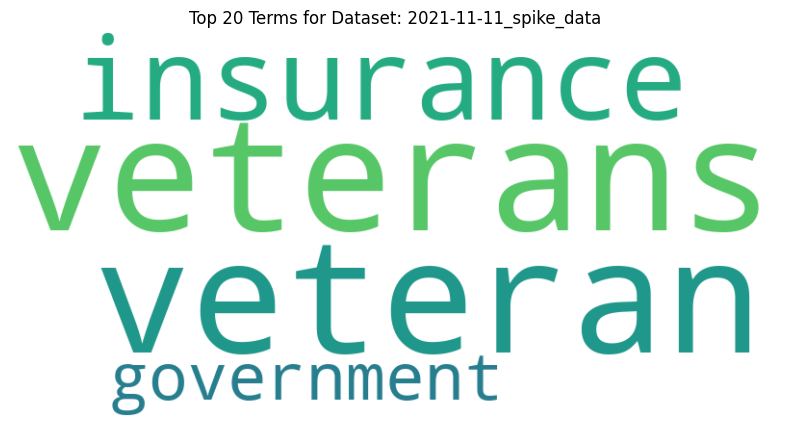

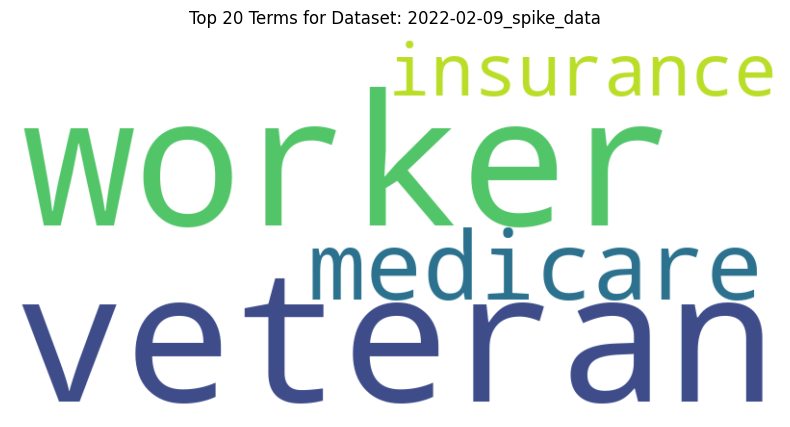

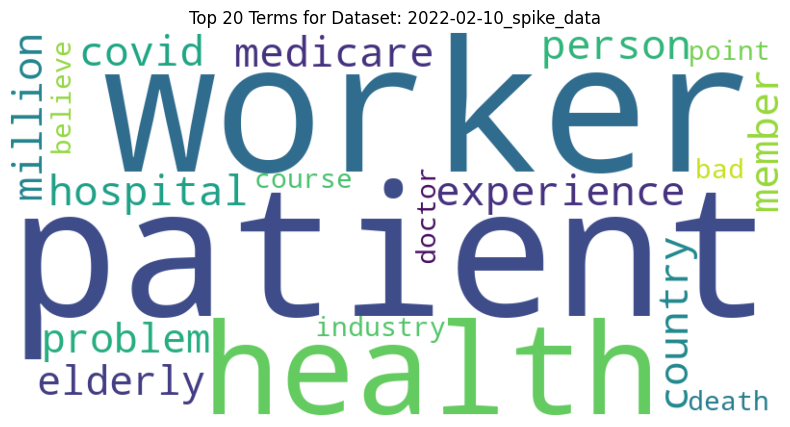

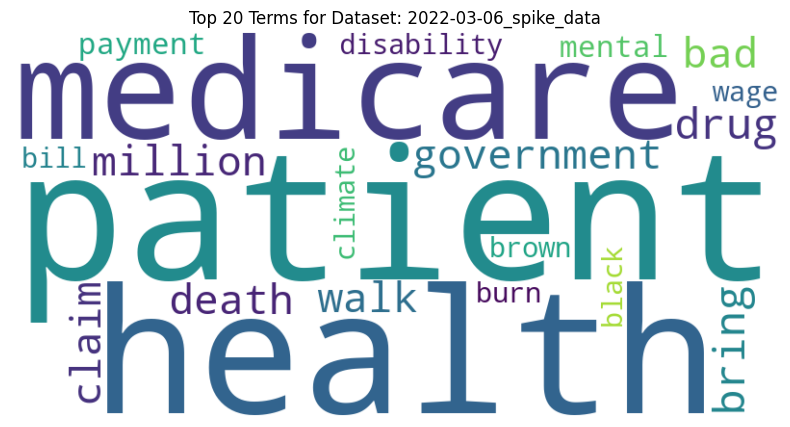

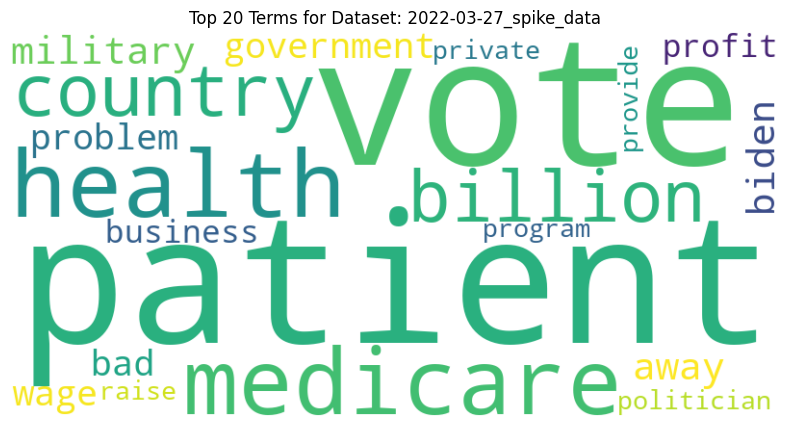

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create the output directory if it doesn't exist
output_dir = 'D:/Research/Python/Data/WIP/TF-IDF Search terms'
os.makedirs(output_dir, exist_ok=True)



# Generate word clouds for each dataset and save them in the output directory
for dataset_name in df_top_20_terms_all['Dataset']:
    # Get the top 20 terms and their scores for the current dataset
    top_20_terms = df_top_20_terms_all[df_top_20_terms_all['Dataset'] == dataset_name].drop(columns='Dataset')
    top_20_terms_dict = top_20_terms.to_dict(orient='records')[0]

    # Replace NaN values with zero
    top_20_terms_dict = {term: 0 if pd.isna(score) else score for term, score in top_20_terms_dict.items()}

    # Generate the word cloud for the current dataset
    wordcloud.generate_from_frequencies(top_20_terms_dict)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Top 20 Terms for Dataset: {dataset_name}')
    
    # Save the plot as an image in the output directory
    output_file = os.path.join(output_dir, f'{dataset_name}_wordcloud.png')
    plt.savefig(output_file, bbox_inches='tight')
    
    # Close the plot to release memory
    plt.close()